## IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import re
import warnings


warnings.simplefilter('ignore')

## FUNÇÕES

In [2]:
def descriptive_stats(num_attributes):
  # Central Tedency - mean, median
  ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T 
  ct2 = pd.DataFrame(num_attributes.apply(np.median)).T 

  # Dispersion - std, min, max, range, skew, curtosis
  d1 = pd.DataFrame(num_attributes.apply(np.std)).T
  d2 = pd.DataFrame(num_attributes.apply(min)).T
  d3 = pd.DataFrame(num_attributes.apply(max)).T
  d4 = pd.DataFrame(num_attributes.apply(lambda x : x.max() - x.min())).T
  d5 = pd.DataFrame(num_attributes.apply(lambda x : x.skew())).T
  d6 = pd.DataFrame(num_attributes.apply(lambda x : x.kurtosis())).T

  # Concatenate
  m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
  m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
  return m

# **TESTE 1, COMBINANDO E EXPLORAÇÃO SUPERFICIAL DOS DADOS (CATEGORIAS E INSUMOS)**

## 0. PREPARAÇÃO DOS DADOS

### 0.1 CARREGANDO OS DADOS

In [3]:
# Schema do dados
schema = {
    'codigo': 'int64',
    'valor': 'float64',
}


insumos = pd.read_csv('/content/drive/MyDrive/PROJETO APLICADO/dados_insumos.csv', 
                      encoding='ISO-8859-1', sep = ";", dtype=schema)

classif = pd.read_csv('/content/drive/MyDrive/PROJETO APLICADO/materiais categorizados/MATERIAIS.csv', 
                      encoding='ISO-8859-1', sep = ";")


### 0.2 CHECAGEM DAS INFORMAÇÕES DOS DADOS PARA COMBINAÇÃO

In [4]:
print('Dtypes insumos: \n')
print(insumos.dtypes)
print('\nDimensão:', insumos.shape)

Dtypes insumos: 

codigo         int64
descricao     object
valor        float64
data          object
dtype: object

Dimensão: (812637, 4)


In [5]:
print('Dtypes insumos: \n')
print(classif.dtypes)
print('\nDimensão:', classif.shape)

Dtypes insumos: 

CODIGO                                              int64
DESCRICAO DO INSUMO                                object
UNIDADE                                            object
Coeficiente de Representatividade Nacional (*)     object
PRECO MEDIANO R$                                   object
ENCARGOS                                          float64
mês                                               float64
ano                                                 int64
localidade                                         object
cat 1                                              object
commodities                                        object
CLASSE                                             object
cat 2                                              object
cat3                                               object
cat4                                               object
outros                                             object
dtype: object

Dimensão: (3427, 16)


### 0.3 SELEÇÃO DOS DADOS

In [6]:
# Deletar as colunas sem utilizade
classif.drop(columns = ['PRECO MEDIANO R$','ENCARGOS','mês', 'ano','localidade'], inplace=True)

# Renomeação dos dados classif
classif.columns =['codigo', 'descricao', 'unidade','coeficiente', 'cat_1',
                 'commodities', 'classe', 'cat_2', 'cat_3', 'cat_4', 'outros']

### 0.4 COMBINAÇÃO DOS DADOS

In [7]:
# Realiza o merge usando a coluna "codigo" como chave de junção
dados = pd.merge(insumos, classif, on='codigo')

### 0.5 DADOS

In [8]:
dados.sample(5)

,codigo,descricao_x,valor,data,descricao_y,unidade,coeficiente,cat_1,commodities,classe,cat_2,cat_3,cat_4,outros
381084,39244,"ELETRODUTO PVC FLEXIVEL CORRUGADO, REFORCADO, ...",1.99,02/17,"ELETRODUTO PVC FLEXIVEL CORRUGADO, REFORCADO, ...",M,"0,998654",MATERIAL,PVC,PLASTICO,Instalações Elétricas e Comunicação,Tubos e conexões (flexíveis),NaN,NaN
263491,3451,"COTOVELO 90 GRAUS DE FERRO GALVANIZADO, COM RO...",8.69,02/20,"COTOVELO 90 GRAUS DE FERRO GALVANIZADO, COM RO...",UN,"1,159178",MATERIAL,ferro galvanizado,METAL,Instalações hidrossanitárias e hidraulicas,Tubos e conexões (rígidos),NaN,NaN
37774,13521,PLACA ESMALTADA P/ IDENTIFICACAO NR DE RUA,94.24,04/11,PLACA DE ACO ESMALTADA PARA IDENTIFICACAO DE R...,UN,"0,330003",MATERIAL,aco esmaltado,METAL,Sinalização,NaN,NaN,Não Armado
32543,12318,REATOR P/ 1 LAMPADA VAPOR DE MERCURIO 400W USO...,71.79,09/16,REATOR P/ 1 LAMPADA VAPOR DE MERCURIO 400W USO...,UN,"1,49796",MATERIAL,aço silico,METAL,Instalações Elétricas e Comunicação,NaN,NaN,NaN
372306,38052,"TUBO DRENO, CORRUGADO, ESPIRALADO, FLEXIVEL, P...",5.80,10/18,"TUBO DRENO, CORRUGADO, ESPIRALADO, FLEXIVEL, P...",M,1,MATERIAL,pead,PLASTICO,Instalações hidrossanitárias e hidraulicas,Tubos e conexões (flexíveis),NaN,NaN


### 0.6 CHECAGEM DAS INFORMAÇÕES APÓS COMBINAÇÃO

**Dtypes e Dimensão**

In [9]:
print('Dtypes insumos: \n')
print(dados.dtypes)
print('\nDimensão:', dados.shape)

Dtypes insumos: 

codigo           int64
descricao_x     object
valor          float64
data            object
descricao_y     object
unidade         object
coeficiente     object
cat_1           object
commodities     object
classe          object
cat_2           object
cat_3           object
cat_4           object
outros          object
dtype: object

Dimensão: (413401, 14)


**Checagem de dados faltantes**

In [10]:
dados.isnull().sum()

codigo              0
descricao_x         0
valor               0
data                0
descricao_y         0
unidade             0
coeficiente         0
cat_1               0
commodities         0
classe              0
cat_2               0
cat_3           20891
cat_4          401360
outros         323360
dtype: int64

### 0.7 CONVERSÃO DOS DADOS

In [11]:
# Conversão da colunas data para datetime
dados['data'] = pd.to_datetime(dados['data'], format='%m/%y')
dados['data'] = dados['data'].dt.strftime('%m/%y')

In [12]:
dados['codigo'] = dados['codigo'].astype(str)

### 0.8 SELEÇÃO DAS VARIAVEIS

In [13]:
dados.drop(columns=['descricao_x', 'unidade'], inplace=True)

### 0.9 DADOS TESTE 1 COMPLETO

In [160]:
dados.sample(10)

,codigo,valor,data,descricao_y,coeficiente,cat_1,commodities,classe,cat_2,cat_3,cat_4,outros
135341,11316,264.80,2017-02-01,"TAMPAO FOFO SIMPLES COM BASE, CLASSE B125 CARG...","0,868217",MATERIAL,ferro fundido,METAL,Instalações hidrossanitárias e hidraulicas,Ferragens de outros construtores,NaN,NaN
23079,5078,7.87,2013-01-01,PREGO DE ACO POLIDO COM CABECA 16 X 27 (2 1/2 ...,"1,072017",MATERIAL,aco polido,METAL,Materiais de Fixação,"Parafusos, porcas, chumbadores",NaN,NaN
330273,34734,1508.31,2016-05-01,"DISJUNTOR TERMICO E MAGNETICO AJUSTAVEIS, TRIP...","155,656458",MATERIAL,Metal e plástico.,OUTROS MATERIAIS DE CONSTRUÇÃO,Instalações Elétricas e Comunicação,NaN,NaN,NaN
360430,40839,52.30,2017-02-01,"PARAFUSO, ASTM A307 - GRAU A, SEXTAVADO, ZINCA...","52,308802",MATERIAL,aço carbono,METAL,Materiais de Fixação,"Parafusos, porcas, chumbadores",NaN,NaN
225421,113,8.70,2012-12-01,ADAPTADOR PVC SOLDAVEL CURTO COM BOLSA E ROSCA...,"2,690598",MATERIAL,pvc,PLASTICO,Instalações hidrossanitárias e hidraulicas,Tubos e conexões (rígidos),NaN,Agua fria
43576,4998,315.46,2016-06-01,PORTA DE MADEIRA-DE-LEI TIPO MEXICANA SEM EMEN...,"1,436869",MATERIAL,madeira angelim,MADEIRA,Esquadrias,Portas e Janelas,NaN,NaN
58141,3679,410.30,2022-11-01,JUNTA DILATACAO ELASTICA PARA CONCRETO (FUGENB...,"310,836735",MATERIAL,plastico,PLASTICO,Materiais estruturais,Plasticos de outros construtores,NaN,NaN
336265,38600,5.40,2022-11-01,CANALETA DE CONCRETO ESTRUTURAL 14 X 19 X 39 C...,"2,040816",MATERIAL,concreto,CIMENTO E CONCRETO,Blocos Estruturais e de Vedação,Produtos de concreto pré-moldado,"Blocos, tijolos, telhas e lajes",Não armado
109226,11749,36.91,2016-08-01,"VALVULA DE ESFERA BRUTA EM BRONZE, BITOLA 3/4 ...","0,672437",MATERIAL,bronze,METAL,Instalações hidrossanitárias e hidraulicas,Torneiras e Válvulas para louças sanitárias,NaN,NaN
59651,3746,40.55,2011-08-01,LAJE PRE-MOLDADA TRELICADA (LAJOTAS + VIGOTAS)...,"1,760465",MATERIAL,concreto armado,CIMENTO E CONCRETO,Materiais estruturais,Produtos de concreto pré-moldado,"Blocos, tijolos, telhas e lajes",Armado


## 0.10 EAD

### NIVEL 1

**Variaveis numéricas**

In [15]:
num_attributes = dados.select_dtypes(include = ['int64', 'float64'])

In [16]:
# Estatistica Descritiva da variavel 'valor'
descriptive_stats(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,valor,0.0,141404.34,141404.34,194.56264,21.55,2051.564099,36.375481,1641.482955


In [17]:
# Quantis

round(num_attributes.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T,2)

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
valor,413401.0,194.56,2051.57,0.0,1.05,6.3,21.55,78.15,269.2,510.63,2237.88,141404.34


<Axes: >

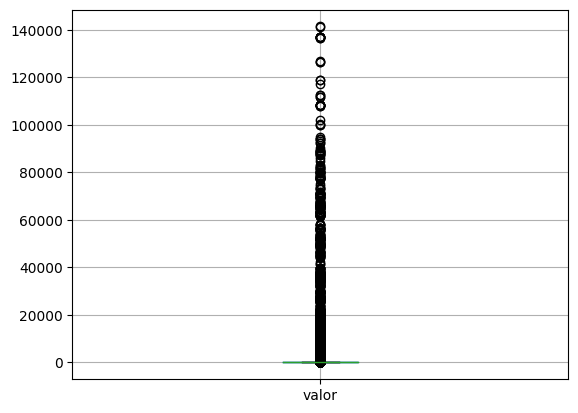

In [18]:
# Visualização da distribuição dos dados
dados.boxplot()

In [53]:
# Seleciona o valor do 98º percentil
q99 = dados['valor'].quantile(0.99)

# Filtra os dados que estão acima do 98º percentil
dados_filtrados = dados[dados['valor'] > q99]

dados_filtrados[['codigo', 'descricao_y','classe','valor']].groupby(['codigo','classe'], as_index=False).mean().sort_values(by='valor', ascending=False)

,codigo,classe,valor
103,7618,OUTROS MATERIAIS DE CONSTRUÇÃO,86219.845165
98,7613,OUTROS MATERIAIS DE CONSTRUÇÃO,68186.808462
97,7612,OUTROS MATERIAIS DE CONSTRUÇÃO,48700.520000
101,7616,OUTROS MATERIAIS DE CONSTRUÇÃO,35504.520989
100,7615,OUTROS MATERIAIS DE CONSTRUÇÃO,21757.335604
...,...,...,...
66,41785,PLASTICO,2317.521667
57,41215,CIMENTO E CONCRETO,2301.361429
94,5051,METAL,2291.811111
12,14162,METAL,2288.482222


**Variaveis categoricas**

In [21]:
cat_attributes = dados.select_dtypes(include = ['object'])

In [36]:
# Dicionario para armazenar os valores
unique_values = {}
for col in cat_attributes.columns:
    unique_values[col] = len(cat_attributes[col].value_counts())

# Transforma o dicionário em um DataFrame
df_unique_values = pd.DataFrame.from_dict(unique_values, orient='index', columns=['Quantidade de valores únicos'])
print(df_unique_values)

             Quantidade de valores únicos
codigo                               3427
data                                  156
descricao_y                          3427
coeficiente                          3139
cat_1                                   1
commodities                           224
classe                                  8
cat_2                                  23
cat_3                                  42
cat_4                                   2
outros                                 16


A quantidade de dados que temos que ter para que os dados estejam completos é:

codigo x data

In [63]:
# Calculo para conferencia dos dados:

a = len(dados['codigo'].unique())
b = len(dados['data'].unique())

qtd_esperada = a * b
qtd_real = dados.shape[0]

diff = qtd_esperada - qtd_real

print('Quantidade esperada de instancias:',qtd_esperada)
print('Quantidade real de instancias:',qtd_real)
print('Diferença:', diff )

Quantidade esperada de instancias: 534612
Quantidade real de instancias: 413401
Diferença: 121211


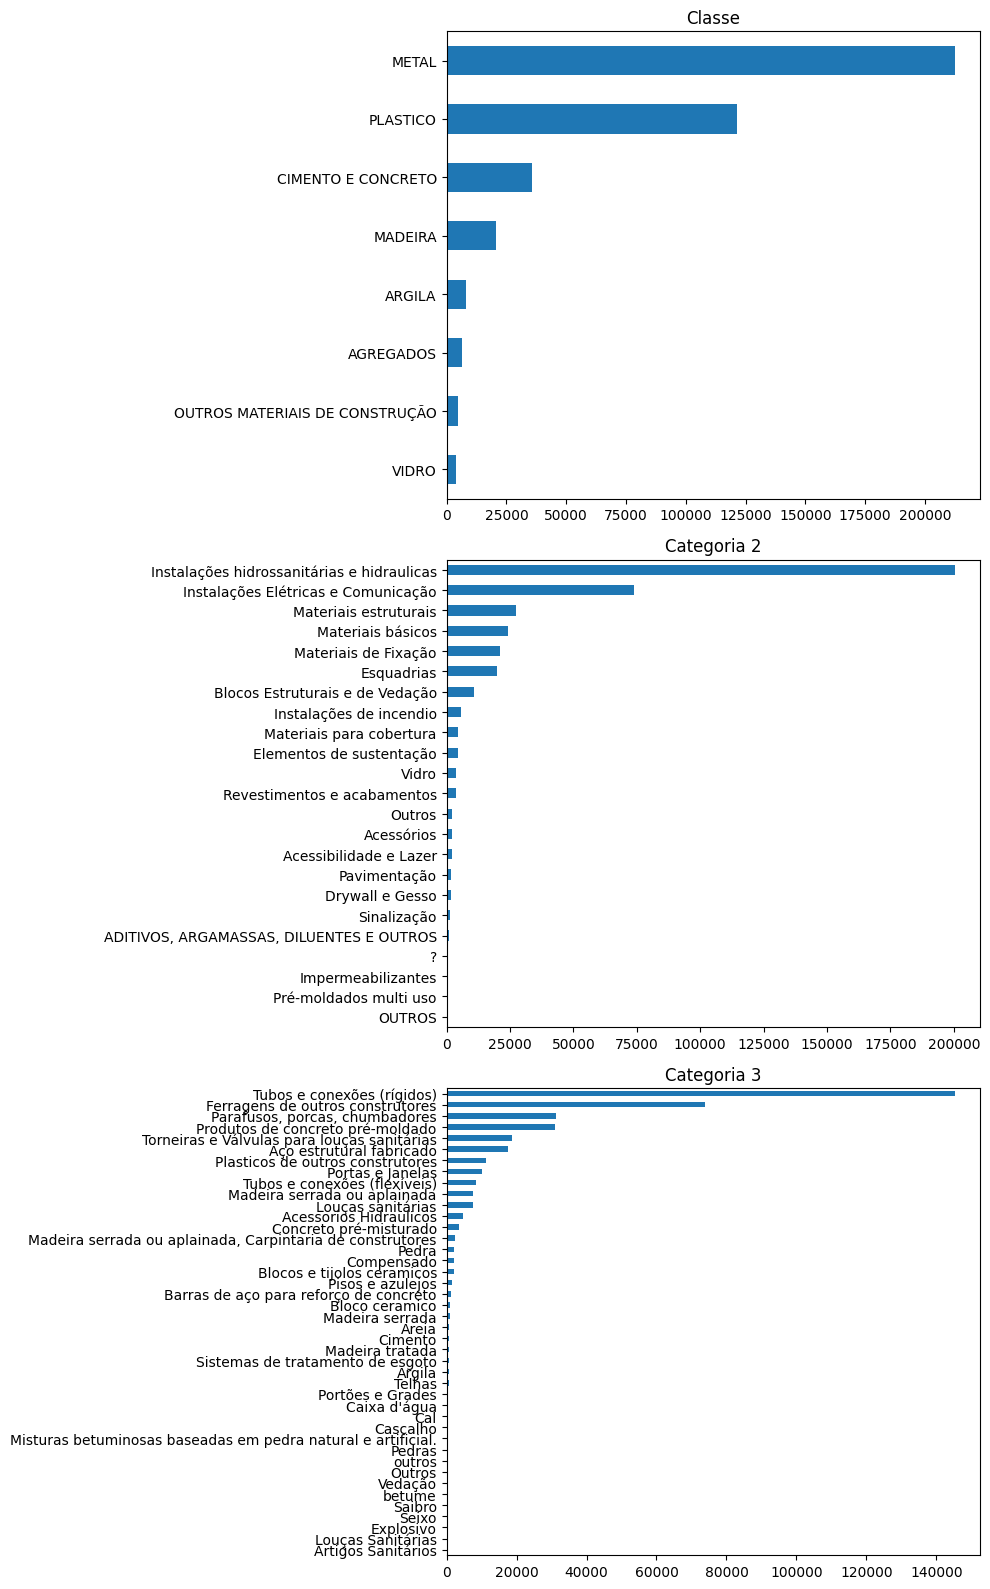

In [38]:
# Cria uma figura e um conjunto de eixos com 1 linha e 3 colunas
fig, axs = plt.subplots(3, 1, figsize=(10, 16))

# Plota o gráfico de barras para a classe
dados.classe.value_counts(ascending=True).plot(kind='barh', ax=axs[0])
axs[0].set_title("Classe")

# Plota o gráfico de barras para a cat_2
dados.cat_2.value_counts(ascending=True).plot(kind='barh', ax=axs[1])
axs[1].set_title("Categoria 2")

# Plota o gráfico de barras para a cat_3
dados.cat_3.value_counts(ascending=True).plot(kind='barh', ax=axs[2])
axs[2].set_title("Categoria 3")

# Ajusta a disposição dos gráficos na figura
plt.tight_layout()

# Mostra a figura
plt.show()


**valor x data**

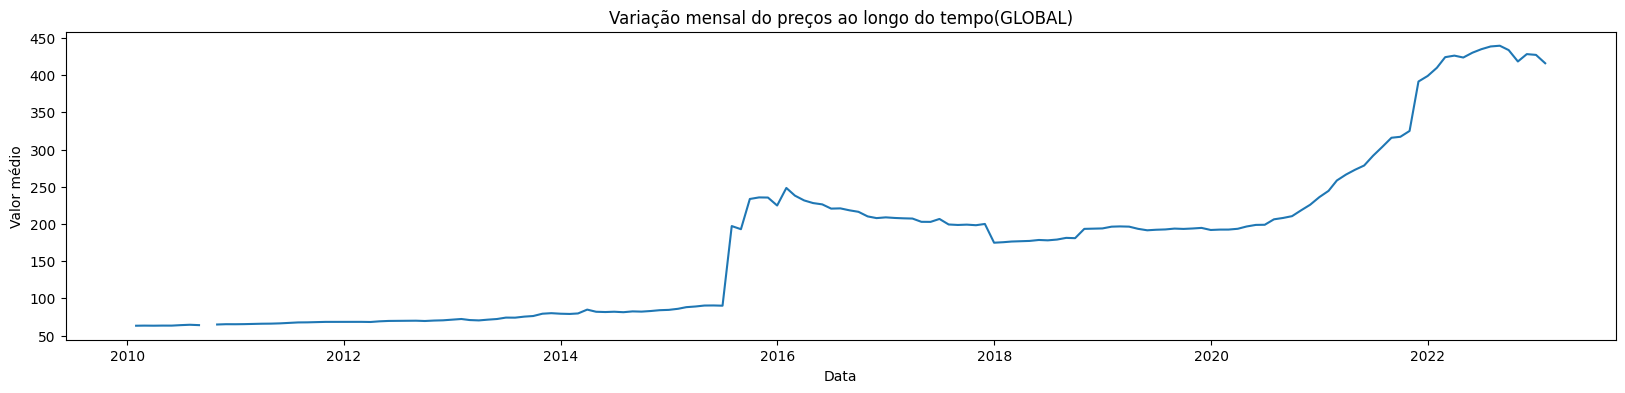

In [64]:
# Converte a coluna 'data' para o formato de data com o formato atual
dados['data'] = pd.to_datetime(dados['data'], format='%m/%y')

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = dados.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['valor'])
plt.title('Variação mensal do preços ao longo do tempo(GLOBAL)')
plt.xlabel('Data')
plt.ylabel('Valor médio')
plt.show()

CONCLUSÕES TESTE 1:

*  Algumas variáveis têm valores faltantes, mas na classificação mais macro dos insumos os dados estão completos.

*  Na variável CLASSE, temos uma grande diferença nas quantidades de insumo de cada categoria. 'METAL', 'PLÁSTICO', 'MADEIRA' e 'CIMENTO E CONCRETO' são os mais plausíveis para prosseguir com as análises.

*  No gráfico da média dos valores dos insumos por mês, nota-se aumentos consideráveis em determinados pontos.

*  A quantidade esperada para a série histórica está completa não bate com a realidade, o que pode explicar isso é a descontinuação de itens ao longo da série histórica. Portanto, explica o gráfico com aumentos inesperados.





# **TESTE 2, COMBINAÇÃO E EXPLORAÇÃO SUPERFICIAL DOS DADOS (RELATÓRIO E INSUMOS)**

## 1. PREPARAÇÃO DOS DADOS

### 1.1 CARREGANDO OS DADOS

In [65]:
# Schema do dados
schema = {
    'codigo': 'int64',
    'valor': 'float64',
}

path = '/content/drive/MyDrive/PROJETO APLICADO/'

relatorio = pd.read_csv(path+'materiais categorizados/relatorio_insumos.csv', 
                      encoding='ISO-8859-1', sep = ";")

### 1.2 CHECAGEM DAS INFORMAÇÕES DOS DADOS PARA COMBINAÇÃO

**Dtypes e Dimensões**

In [66]:
print('Dtypes insumos: \n')
print(insumos.dtypes)
print('\nDimensão:', insumos.shape)

Dtypes insumos: 

codigo         int64
descricao     object
valor        float64
data          object
dtype: object

Dimensão: (812637, 4)


In [67]:
print('Dtypes insumos: \n')
print(relatorio.dtypes)
print('\nDimensão:', classif.shape)

Dtypes insumos: 

cod_rep                 int64
codigo                  int64
Descrição do Insumo    object
unidade                object
coeficiente            object
categoria              object
macro_classe           object
vinculo                object
dtype: object

Dimensão: (3427, 11)


**Checagem de dados faltantes**

In [71]:
relatorio.isnull().sum()

cod_rep                 0
codigo                  0
Descrição do Insumo     0
unidade                 0
coeficiente             0
categoria               0
macro_classe           51
vinculo                 0
dtype: int64

### 1.3 SELEÇÃO DOS DADOS

In [72]:
# Deletar as colunas sem utilizade
relatorio.drop(columns = ['vinculo'], inplace=True)

### 1.4 COMBINAÇÃO DOS DADOS

In [73]:
# Realiza o merge usando a coluna "codigo" como chave de junção
dados_1 = pd.merge(insumos, relatorio, on='codigo')

### 1.5 DADOS

In [74]:
dados_1.sample(5)

,codigo,descricao,valor,data,cod_rep,Descrição do Insumo,unidade,coeficiente,categoria,macro_classe
178565,11718,REGISTRO PVC PRESSAO S-30 ROSCAVEL DN 3/4,19.51,06/13,6031,"REGISTRO DE PRESSAO PVC, ROSCAVEL, VOLANTE SIM...",UN,"0,933333",REPRESENTADO,MATERIAL
524028,40975,AUXILIAR DE MECANICO (MENSALISTA),2741.16,10/21,4234,AUXILIAR DE MECANICO (MENSALISTA),MES,"142,634855",REPRESENTADO,MÃO DE OBRA
8530,4825,"PEITORIL/ SOLEIRA EM MARMORE, POLIDO, BRANCO C...",56.23,09/17,4818,"PEITORIL/ SOLEIRA EM MARMORE, POLIDO, BRANCO C...",M,"0,351488",REPRESENTADO,MATERIAL
492667,38175,"NUMERO / ALGARISMO PARA PORTA, TAMANHO *40* MM...",2.27,09/18,5090,"NUMERO / ALGARISMO PARA RESIDENCIA (FACHADA), ...",UN,"0,232330",REPRESENTADO,MATERIAL
530805,39463,"DISPOSITIVO DR, 4 POLOS, SENSIBILIDADE DE 300 ...",386.76,01/20,2370,"DISPOSITIVO DR, 4 POLOS, SENSIBILIDADE DE 300 ...",UN,"44,000000",REPRESENTADO,MATERIAL


### 1.6 CHECAGEM DAS INFORMAÇÕES APÓS COMBINAÇÃO

**Dtypes e Dimensão**

In [76]:
print('Dtypes insumos: \n')
print(dados_1.dtypes)
print('\nDimensão:', dados_1.shape)

Dtypes insumos: 

codigo                   int64
descricao               object
valor                  float64
data                    object
cod_rep                  int64
Descrição do Insumo     object
unidade                 object
coeficiente             object
categoria               object
macro_classe            object
dtype: object

Dimensão: (577218, 10)


**Checagem de valors faltantes**

In [75]:
dados_1.isnull().sum()

codigo                    0
descricao                 0
valor                     0
data                      0
cod_rep                   0
Descrição do Insumo       0
unidade                   0
coeficiente               0
categoria                 0
macro_classe           2160
dtype: int64

### 1.7 CONVERSÃO DOS DADOS

In [77]:
# Conversão da coluna data para datetime
dados_1['data'] = pd.to_datetime(dados_1['data'], format='%m/%y')

In [78]:
# Conversão da coluna codigo para object
dados_1['codigo'] = dados_1['codigo'].astype(str)

# Conversão da coluna cod_rep para object
dados_1['cod_rep'] = dados_1['cod_rep'].astype(str)

### 1.8 SELEÇÃO DOS DADOS

In [79]:
# Deletar as colunas sem utilizade
dados_1.drop(columns = ['descricao'], inplace=True)

### 1.9 DADOS ETAPA 0 COMPLETOS

In [163]:
dados_1.head(10)

,codigo,valor,data,cod_rep,Descrição do Insumo,unidade,coeficiente,categoria,macro_classe
0,414,0.07,2010-01-01,411,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",REPRESENTADO,MATERIAL
1,414,0.06,2011-01-01,411,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",REPRESENTADO,MATERIAL
2,414,0.06,2012-01-01,411,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",REPRESENTADO,MATERIAL
3,414,0.05,2013-01-01,411,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",REPRESENTADO,MATERIAL
4,414,0.06,2014-01-01,411,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",REPRESENTADO,MATERIAL
5,414,0.04,2015-01-01,411,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",REPRESENTADO,MATERIAL
6,414,0.04,2016-01-01,411,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",REPRESENTADO,MATERIAL
7,414,0.05,2017-01-01,411,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",REPRESENTADO,MATERIAL
8,414,0.04,2018-01-01,411,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",REPRESENTADO,MATERIAL
9,414,0.04,2019-01-01,411,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",REPRESENTADO,MATERIAL


## 1.10 EAD

### NIVEL 1

**Variaveis numéricas**

In [84]:
num_attributes = dados_1.select_dtypes(include = ['int64', 'float64'])

In [85]:
# Estatistica Descritiva da variavel 'valor'
descriptive_stats(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,valor,0.0,8958602.97,8958602.97,16621.525967,25.97,164881.400347,21.321288,660.072408


In [86]:
# Quantis

round(num_attributes.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T,2)

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
valor,577218.0,16621.53,164881.54,0.0,1.17,7.58,25.97,125.53,953.2,6695.09,443021.52,8958602.97


<Axes: >

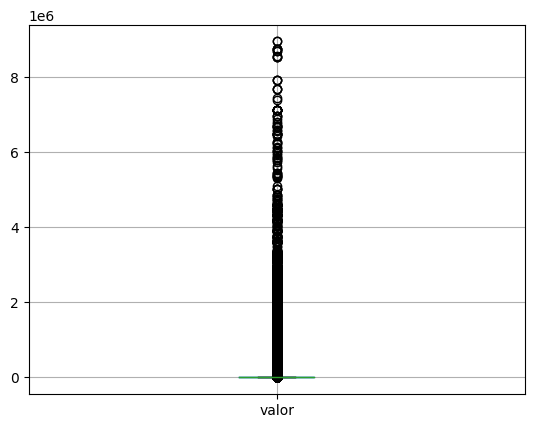

In [87]:
# Visualização da distribuição dos dados
dados_1.boxplot()

In [91]:
# Seleciona o valor do 98º percentil
q99 = dados_1['valor'].quantile(0.95)

# Filtra os dados que estão acima do 98º percentil
dados_filtrados = dados_1[dados_1['valor'] > q99]

round(dados_filtrados.groupby('cod_rep', as_index=False).mean().sort_values(by='valor', ascending=False),2)[:20]

,cod_rep,valor
0,10488,1902466.09
47,9912,1323582.87
44,7624,1301837.47
7,10685,920964.91
33,4090,754295.13
37,4262,487854.19
34,41992,436701.65
48,9914,420790.46
25,37515,400342.04
21,3363,370251.87


**Variaveis categoricas**

In [92]:
cat_attributes = dados_1.select_dtypes(include = ['object'])

In [93]:
# Dicionario para armazenar os valores
unique_values = {}
for col in cat_attributes.columns:
    unique_values[col] = len(cat_attributes[col].value_counts())

# Transforma o dicionário em um DataFrame
df_unique_values = pd.DataFrame.from_dict(unique_values, orient='index', columns=['Quantidade de valores únicos'])
print(df_unique_values)

                     Quantidade de valores únicos
codigo                                       4937
cod_rep                                       315
Descrição do Insumo                          4937
unidade                                        21
coeficiente                                  4374
categoria                                       2
macro_classe                                    7


A quantidade de dados que temos que ter para que os dados estejam completos é:

codigo x data

In [95]:
# Calculo para conferencia dos dados:

a = len(dados_1['codigo'].unique())
b = len(dados_1['data'].unique())

qtd_esperada = a * b
qtd_real = dados_1.shape[0]

diff = qtd_esperada - qtd_real

print('Quantidade esperada de instancias:',qtd_esperada)
print('Quantidade real de instancias:',qtd_real)
print('Diferença:', diff )

Quantidade esperada de instancias: 775109
Quantidade real de instancias: 577218
Diferença: 197891


**Valores unicos por categoria**

In [100]:
dados_1.categoria.value_counts()


REPRESENTADO      539691
REPRESENTATIVO     37527
Name: categoria, dtype: int64

**Valores unicos por macro_classe**

In [101]:
dados_1.macro_classe.value_counts()

MATERIAL                   508983
EQUIPAMENTO (AQUISIÇÃO)     37247
MÃO DE OBRA                 23894
EQUIPAMENTO (LOCAÇÃO)        3132
ESPECIAIS                    1071
SERVIÇOS                      715
ESTRUTURAS                     16
Name: macro_classe, dtype: int64

**valor x data   para a categoria MATERIAL**

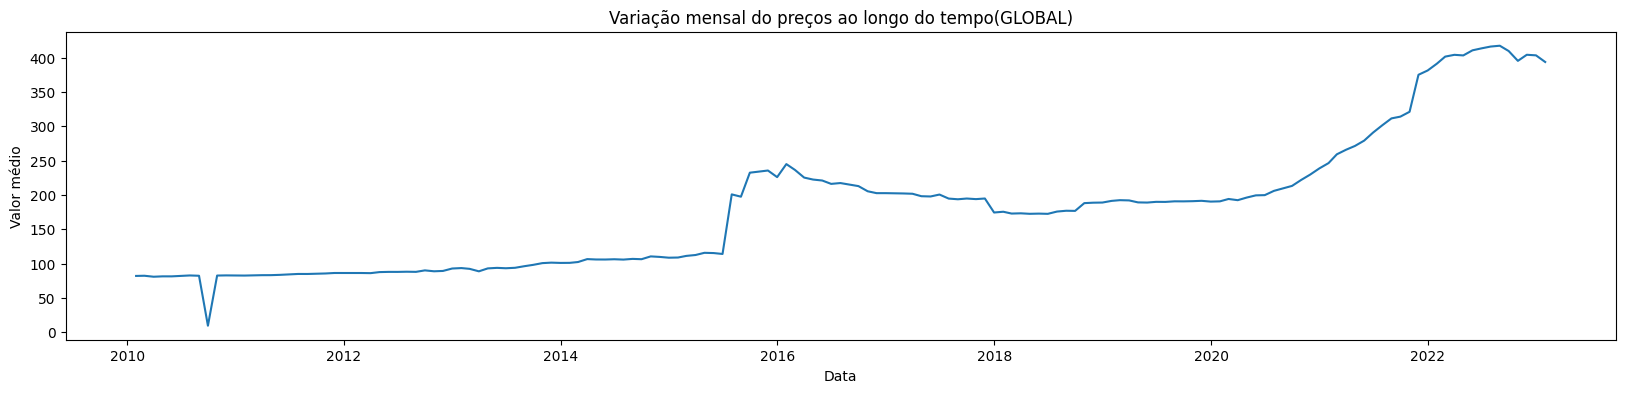

In [103]:
# Converte a coluna 'data' para o formato de data com o formato atual
dados_1['data'] = pd.to_datetime(dados_1['data'], format='%m/%y')

dados_1_material = dados_1[dados_1['macro_classe'] == 'MATERIAL']

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = dados_1_material.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['valor'])
plt.title('Variação mensal do preços ao longo do tempo(GLOBAL)')
plt.xlabel('Data')
plt.ylabel('Valor médio')
plt.show()

CONCLUSÕES TESTE 2:

*  Essa junção tem como objetivo pegar todos os dados de insumos que estão sendo atualizados atualmente pelo SINAPI para realizar uma análise em insumos que não foram incluídos nas categorias para predição.

*  Algumas variáveis têm valores faltantes, mas são solucionados quando filtrados, por isso manterei.

*  No gráfico da média dos valores dos insumos por mês, nota-se aumentos consideráveis em determinados pontos.

*  A quantidade esperada para a série histórica está completa não bate com a realidade, o que pode explicar isso é a descontinuação de itens ao longo da série histórica. Portanto, explica o gráfico com aumentos inesperados.

*  A diferença de insumos entre a quantidade de insumos pode ser analisada de duas formas: primeiro, a descontinuação de itens e algum problema na extração dos dados.

* Mesmo com essas diferenças, podemos filtrar os dados e deixar somente os que têm as séries históricas completas. Além disso, podemos utilizar o cod_rep e o coeficiente para nos ajudar a prever os valores dos insumos, visto que eles categorizam e calculam seu preço de sua forma. Com isso em mente, podemos então seguir por um caminho mais robusto.




# **TESTE 3, COMBINAÇÃO E EXPLORAÇÃO SUPERFICIAL DOS DADOS (INDICES E INSUMOS)**

## PREPARAÇÃO DOS DADOS

### 2.1 CARREGANDO DOS DADOS

In [104]:
# Caminho dos dados
caminho_pasta = '/content/drive/MyDrive/PROJETO APLICADO/indices'


cub = pd.read_csv(caminho_pasta+'/cub_es.csv', sep=';')
indice = pd.read_csv(caminho_pasta+'/inpc.csv', sep=';')
juros = pd.read_csv(caminho_pasta+'/selic.csv', sep=';')


### 2.2 CHECAGEM DAS INFORMAÇÕES DOS DADOS PARA COMBINAÇÃO

**CUB**

In [105]:
print('Dtypes cub: \n')
print(cub.dtypes)
print('\nDimensão:', cub.shape)
print('\n',cub.head(3))

Dtypes cub: 

data       object
cub/m2     object
cub_mes    object
dtype: object

Dimensão: (192, 3)

          data  cub/m2 cub_mes
0  01/02/2007  376,91     ...
1  01/03/2007   381,2    1,14
2  01/04/2007  381,52    0,08


**INDICE**

In [106]:
print('Dtypes indice: \n')
print(indice.dtypes)
print('\nDimensão:', indice.shape)
print('\n',indice.head(3))

Dtypes indice: 

data           object
inpc_indice    object
inpc_mes       object
dtype: object

Dimensão: (326, 3)

          data inpc_indice inpc_mes
0  01/01/1996    1.273,92     1,46
1  01/02/1996    1.282,96     0,71
2  01/03/1996    1.286,68     0,29


**JUROS**

In [107]:
print('Dtypes juros: \n')
print(juros.dtypes)
print('\nDimensão:', juros.shape)
print('\n',juros.head(3))

Dtypes juros: 

data         object
selic_mes    object
dtype: object

Dimensão: (324, 2)

          data selic_mes
0  01/01/1996      2,58
1  01/02/1996      2,35
2  01/03/1996      2,22


**INSUMOS**

In [108]:
print('Dtypes insumos: \n')
print(insumos.dtypes)
print('\nDimensão:', insumos.shape)
print('\n',insumos.head(3))

Dtypes insumos: 

codigo         int64
descricao     object
valor        float64
data          object
dtype: object

Dimensão: (812637, 4)

    codigo                                          descricao  valor   data
0     414  ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...   0.07  01/10
1    4715                      PEDRA ARDOSIA CINZA IRREGULAR   7.28  01/10
2    4491  PECA DE MADEIRA 3A/4A QUALIDADE 7,5 X 7,5CM (3...   3.67  01/10


### 2.3 TRATAMENTO DOS DADOS

In [109]:
# Transformando os dados para combinação
cub['data'] = pd.to_datetime(cub['data'], format='%d/%m/%Y')
cub['data'] = cub['data'].dt.strftime('%m/%y')

indice['data'] = pd.to_datetime(indice['data'], format='%d/%m/%Y')
indice['data'] = indice['data'].dt.strftime('%m/%y')

juros['data'] = pd.to_datetime(juros['data'], format='%d/%m/%Y')
juros['data'] = juros['data'].dt.strftime('%m/%y')

### 2.4 COMBINAÇÃO DOS DADOS

In [110]:
# Realiza o merge usando a coluna "data" como chave de junção
indice1 = pd.merge(indice, juros, on='data')

indices = pd.merge(indice1, cub, on='data')

dados_2 = pd.merge(insumos, indices, on='data')

### 2.5 DADOS

In [111]:
dados_2.sample(5)

,codigo,descricao,valor,data,inpc_indice,inpc_mes,selic_mes,cub/m2,cub_mes
792654,39603,"CONECTOR MACHO RJ - 45, CATEGORIA 6 ...",2.83,12/20,"5.746,71","1,46","0,16","850,56","2,29"
433772,3620,JUNCAO FOFO 45 GR C/FLANGES PN-25 DN 200X200,1650.32,07/15,"4.475,17","0,58","1,18","548,53","0,45"
127478,6086,!EM PROCESSO DE DESATIVACAO! FUNDO SINTETICO N...,97.80,02/21,"5.809,48","0,82","0,13","880,67","1,78"
498774,1109,CALHA CHAPA GALVANIZADA NUM 26 L = 35CM,12.27,08/14,"4.082,90","0,18","0,87","517,7","0,75"
448793,20204,"PRANCHAO DE MADEIRA APARELHADA *7,5 X 23* CM (...",56.48,07/18,"5.185,48","0,25","0,54","670,3","0,29"


### 2.6 CHECAGEM DAS INFORMAÇÕES APÓS COMBINAÇÃO

**Dtypes e Dimensão**

In [112]:
print('Dtypes insumos: \n')
print(dados_2.dtypes)
print('\nDimensão:', dados_2.shape)

Dtypes insumos: 

codigo           int64
descricao       object
valor          float64
data            object
inpc_indice     object
inpc_mes        object
selic_mes       object
cub/m2          object
cub_mes         object
dtype: object

Dimensão: (807700, 9)


**Checagem de dados faltantes**

In [113]:

dados_2.isnull().sum()

codigo         0
descricao      0
valor          0
data           0
inpc_indice    0
inpc_mes       0
selic_mes      0
cub/m2         0
cub_mes        0
dtype: int64

### 2.7 CONVERSÃO DOS DADOS

**Conversão de object para float64 (inpc_indice, inpc_mes, selic_mes, cub/m2, cub_mes)**

In [114]:
# Colunas para conversão
colunas = ['inpc_indice', 'inpc_mes','selic_mes',
           'cub/m2', 'cub_mes' ]

# Iteração em cada coluna
for coluna in colunas:           
  dados_2[coluna] = pd.to_numeric(dados_2[coluna].str.replace('.', '').str.replace(',', '.'))  

### 2.8 SELEÇÃO DOS DADOS

### 2.9 DADOS TESTE 2 COMPLETO

In [164]:
dados_2.head(10)

,codigo,descricao,valor,data,inpc_indice,inpc_mes,selic_mes,cub/m2,cub_mes
0,414,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",0.07,2010-01-01,3124.76,0.88,0.66,441.67,0.01
1,4715,PEDRA ARDOSIA CINZA IRREGULAR,7.28,2010-01-01,3124.76,0.88,0.66,441.67,0.01
2,4491,"PECA DE MADEIRA 3A/4A QUALIDADE 7,5 X 7,5CM (3...",3.67,2010-01-01,3124.76,0.88,0.66,441.67,0.01
3,4500,"PECA DE MADEIRA 3A/4A QUALIDADE 7,5 X 10CM NAO...",5.68,2010-01-01,3124.76,0.88,0.66,441.67,0.01
4,4512,"PECA DE MADEIRA 3A/4A QUALIDADE 2,5 X 5CM NAO ...",1.16,2010-01-01,3124.76,0.88,0.66,441.67,0.01
5,4505,PECA DE MADEIRA 3A/4A QUALIDADE 1 X 7CM NAO AP...,1.45,2010-01-01,3124.76,0.88,0.66,441.67,0.01
6,4509,"PECA DE MADEIRA 3A QUALIDADE 2,5 X 10CM NAO AP...",1.88,2010-01-01,3124.76,0.88,0.66,441.67,0.01
7,4497,PECA DE MADEIRA 3A QUALIDADE 10 X 10CM NAO APA...,5.09,2010-01-01,3124.76,0.88,0.66,441.67,0.01
8,4704,PEDRA ARDOSIA CINZA 20 X 40CM E = 1CM,9.31,2010-01-01,3124.76,0.88,0.66,441.67,0.01
9,4510,"PECA DE MADEIRA 3A QUALIDADE 1,5 X 4CM NAO APA...",1.01,2010-01-01,3124.76,0.88,0.66,441.67,0.01


## 2.10 EAD

### NIVEL 1

**Variaveis numéricas**

In [117]:
num_attributes = dados_2.select_dtypes(include = ['int64', 'float64'])

In [118]:
# Estatistica Descritiva da variavel 'valor'
descriptive_stats(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,codigo,1.00,44945.00,44944.00,14437.663449,10519.00,13989.089999,0.904682,-0.703425
1,valor,0.00,8958602.97,8958602.97,18153.986031,28.81,173205.200311,20.694765,596.551582
2,inpc_indice,3124.76,6706.15,3581.39,4709.609906,4918.12,1002.553372,0.187982,-0.950444
3,inpc_mes,-0.60,1.71,2.31,0.494964,0.49,0.403467,0.303004,0.327349
4,selic_mes,0.13,1.22,1.09,0.720510,0.76,0.277970,-0.302260,-0.768117
5,cub/m2,437.51,1214.56,777.05,657.541192,607.76,212.574322,1.308990,0.761430
6,cub_mes,-0.94,4.44,5.38,0.654391,0.40,0.789903,2.237526,6.056365


In [119]:
# Quantis

round(num_attributes.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T,2)

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
codigo,807700.0,14437.66,13989.10,1.00,581.00,3461.00,10519.00,21040.00,39144.00,39879.00,43053.00,44945.00
valor,807700.0,18153.99,173205.31,0.00,1.24,8.20,28.81,148.30,1153.68,8477.33,451508.82,8958602.97
inpc_indice,807700.0,4709.61,1002.55,3124.76,3205.83,3813.73,4918.12,5355.77,6160.89,6614.89,6685.86,6706.15
inpc_mes,807700.0,0.49,0.40,-0.60,-0.13,0.21,0.49,0.73,0.99,1.20,1.51,1.71
selic_mes,807700.0,0.72,0.28,0.13,0.19,0.52,0.76,0.94,1.07,1.12,1.18,1.22
cub/m2,807700.0,657.54,212.57,437.51,456.24,490.32,607.76,720.29,1075.63,1175.75,1209.77,1214.56
cub_mes,807700.0,0.65,0.79,-0.94,0.07,0.18,0.40,0.81,1.74,2.39,4.27,4.44


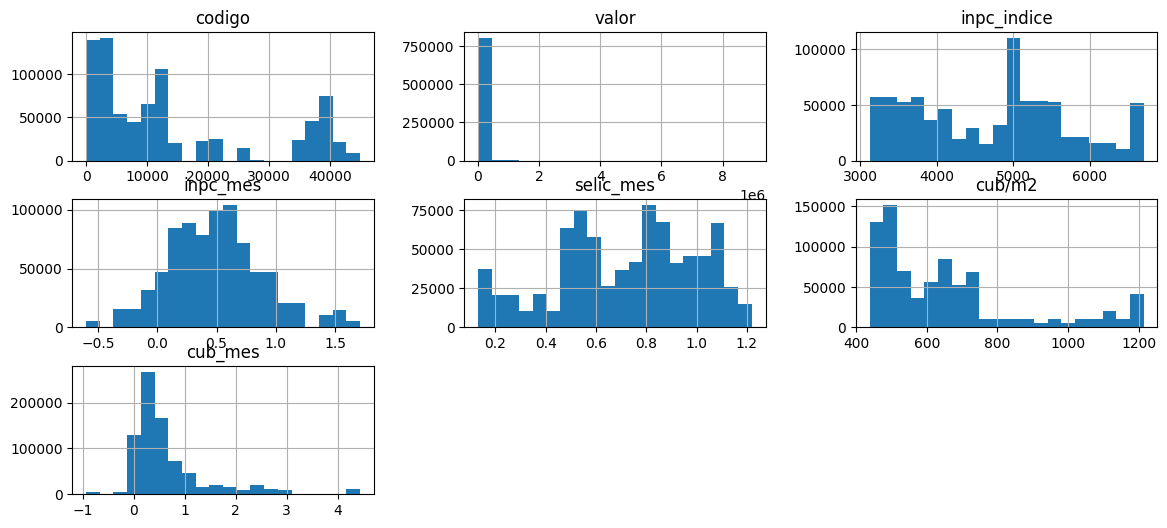

In [123]:
# Visualização da distribuição dos dados
dados_2.hist(figsize=(14,6), bins=20);

**Variaveis categoricas**

In [128]:
cat_attributes = dados_2.select_dtypes(include = ['object'])

In [129]:
# Dicionario para armazenar os valores
unique_values = {}
for col in cat_attributes.columns:
    unique_values[col] = len(cat_attributes[col].value_counts())

# Transforma o dicionário em um DataFrame
df_unique_values = pd.DataFrame.from_dict(unique_values, orient='index', columns=['Quantidade de valores únicos'])
print(df_unique_values)

           Quantidade de valores únicos
descricao                         26284
data                                156


A quantidade de dados que temos que ter para que os dados estejam completos é:

codigo x data

In [131]:
# Calculo para conferencia dos dados:

a = len(dados_2['codigo'].unique())
b = len(dados_2['data'].unique())

qtd_esperada = a * b
qtd_real = dados_2.shape[0]

diff = qtd_esperada - qtd_real

print('Quantidade esperada de instancias:',qtd_esperada)
print('Quantidade real de instancias:',qtd_real)
print('Diferença:', diff )

Quantidade esperada de instancias: 1256580
Quantidade real de instancias: 807700
Diferença: 448880


**Adicionar variação mensal para valor**

**Correlação entre as variaveis**

In [145]:
df1 = dados_2.copy()

In [147]:
var_global = df1.groupby('data', as_index=False).mean()

In [148]:
var_global['data_1'] = pd.to_datetime(var_global['data'], format='%m/%y')
var_global['ano'] = var_global['data_1'].dt.year
var_global['mes'] = var_global['data_1'].dt.month

In [149]:
# Calcula a variação percentual mensal
var_global['variacao_mensal'] = var_global['valor'].pct_change() * 100
var_global['variacao_mensal'] = var_global['variacao_mensal'].fillna(0)

# Calcula o acumulado percentual
var_global['acumulado_percentual'] = (1 + var_global['variacao_mensal'] / 100).cumprod() * 100 - 100
var_global['acumulado_percentual'] = var_global['acumulado_percentual'].fillna(0)

In [152]:
var_global.head()

,data,codigo,valor,inpc_indice,inpc_mes,selic_mes,cub/m2,cub_mes,data_1,ano,mes,variacao_mensal,acumulado_percentual
0,01/10,7954.998279,15547.337219,3124.76,0.88,0.66,441.67,0.01,2010-01-01,2010,1,0.000000,0.000000
1,01/11,7959.719372,16275.261032,3328.76,0.94,0.86,464.18,0.53,2011-01-01,2011,1,4.681984,4.681984
2,01/12,7972.261144,16499.769131,3516.11,0.51,0.89,475.01,0.10,2012-01-01,2012,1,1.379444,6.126013
3,01/13,7971.251818,16518.511579,3749.25,0.92,0.60,484.65,0.11,2013-01-01,2013,1,0.113592,6.246564
4,01/14,7953.551570,17703.071375,3946.44,0.63,0.85,502.98,0.74,2014-01-01,2014,1,7.171105,13.865617


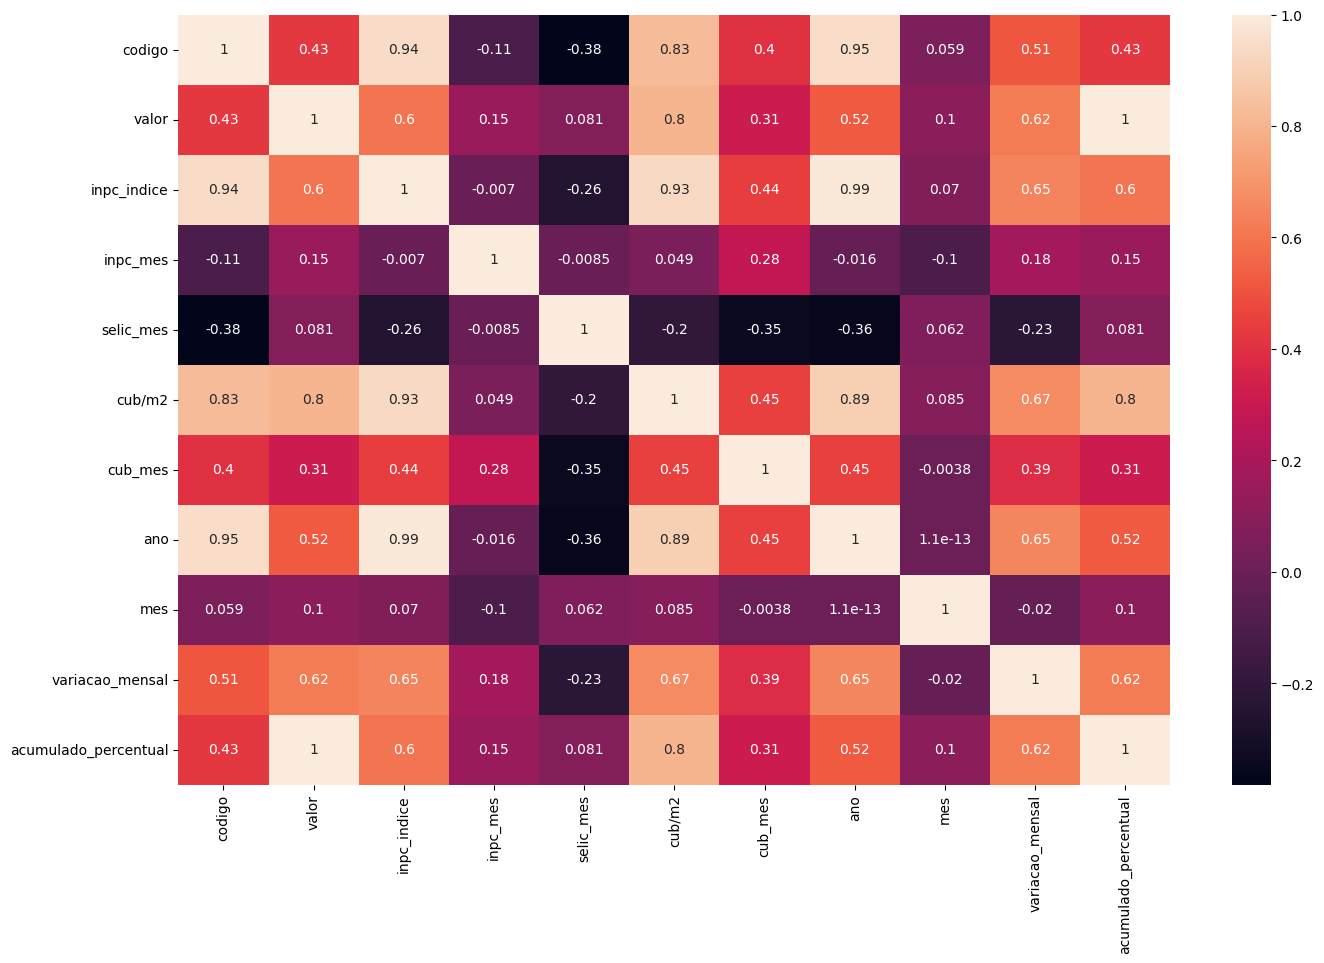

In [153]:
plt.figure(figsize=(16, 10))
sns.heatmap(var_global.corr(method='pearson'), annot=True);

In [154]:
var_global.head()

,data,codigo,valor,inpc_indice,inpc_mes,selic_mes,cub/m2,cub_mes,data_1,ano,mes,variacao_mensal,acumulado_percentual
0,01/10,7954.998279,15547.337219,3124.76,0.88,0.66,441.67,0.01,2010-01-01,2010,1,0.000000,0.000000
1,01/11,7959.719372,16275.261032,3328.76,0.94,0.86,464.18,0.53,2011-01-01,2011,1,4.681984,4.681984
2,01/12,7972.261144,16499.769131,3516.11,0.51,0.89,475.01,0.10,2012-01-01,2012,1,1.379444,6.126013
3,01/13,7971.251818,16518.511579,3749.25,0.92,0.60,484.65,0.11,2013-01-01,2013,1,0.113592,6.246564
4,01/14,7953.551570,17703.071375,3946.44,0.63,0.85,502.98,0.74,2014-01-01,2014,1,7.171105,13.865617


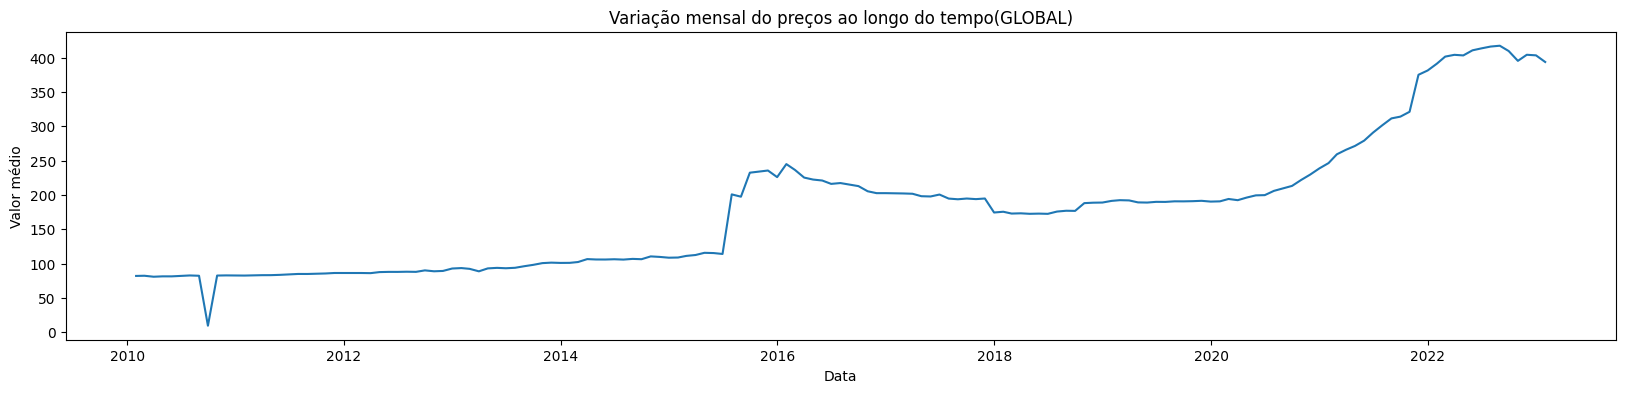

In [159]:
# Converte a coluna 'data' para o formato de data com o formato atual
dados_2['data'] = pd.to_datetime(dados_2['data'], format='%m/%y')

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = dados_1_material.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['valor'])
plt.title('Variação mensal do preços ao longo do tempo(GLOBAL)')
plt.xlabel('Data')
plt.ylabel('Valor médio')
plt.show()

In [ ]:
# Converte a coluna 'data' para o formato de data com o formato atual
dados_2['data'] = pd.to_datetime(dados_2['data'], format='%m/%y')

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = dados_1_material.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['valor'])
plt.title('Variação mensal do preços ao longo do tempo(GLOBAL)')
plt.xlabel('Data')
plt.ylabel('Valor médio')
plt.show()